# Analysis Outline:

In this project wine quality is predicted using Random Forest Algorithm.
The measured features are 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'.

The project is conducted using following steps:
1. Data Exploration using Univariate and Bivariate analysis techniques.
2. Data Cleaning
3. Data preparation for model
4. Fitting the base Random Forest (RF) model
5. Improving the model by data transformation(SMOTE oversampling of minority classes) and Fitting RF model again to compare results
6. Improving the model further by reducing the categories by 3 based on their quality (quality of 3&4 -> category 1, quality of 5&6 -> category 2, quality of 7&8 -> category 3) and SMOTE oversampling of minority classes 

# Conclusion:
Grouping data into 3 categories along with oversampling minority classes has improved model performance (overall accuracy of 0.93). 
Using original categories combined with oversampling minority classes resulted in overall accuracy of 0.85 and the base model (using original data without any transformation) had overall accuracy of 0.65 without the ability of predicting minority classes. 



In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime
import time
%matplotlib inline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [4]:
data = pd.read_csv("wine_quality.txt", sep = ';')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# number of observations for each wine quality
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

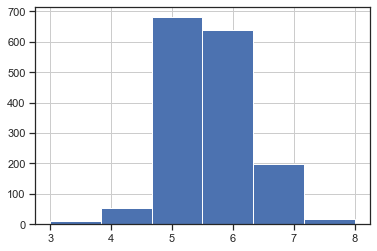

In [64]:
#Distribution of wine quality
data['quality'].hist(bins=6)

We can see that number of samples for qualities of 3,4,8 are much lower than 5,6,7.

In [14]:
#null values in dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not have any null values.

In [24]:
features = data.drop('quality', axis=1)

In [29]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


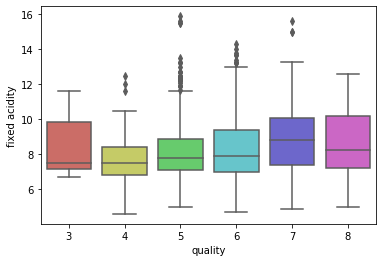

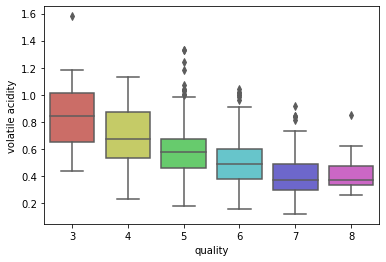

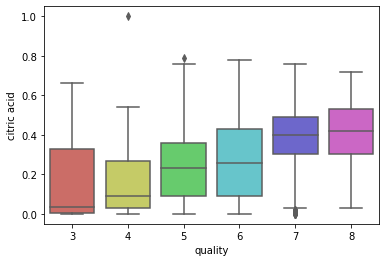

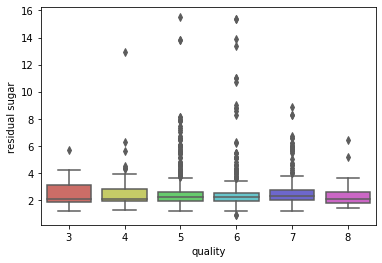

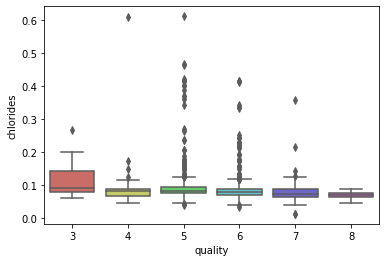

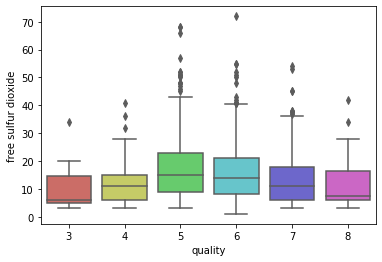

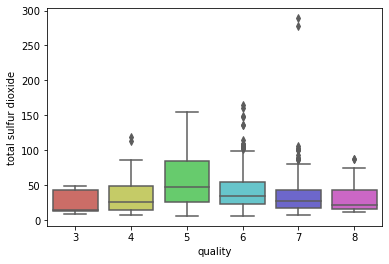

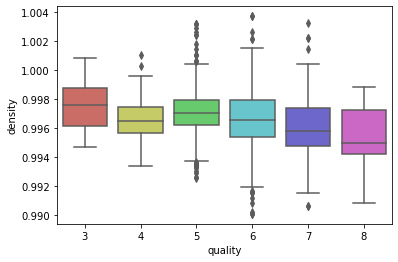

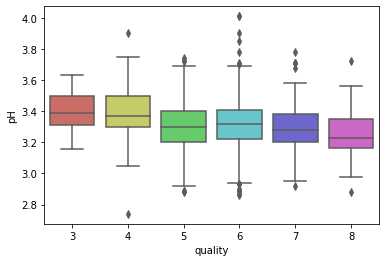

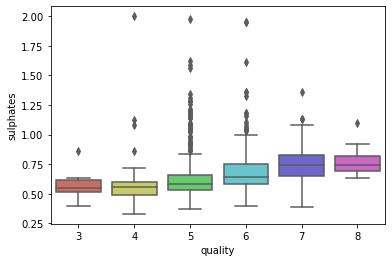

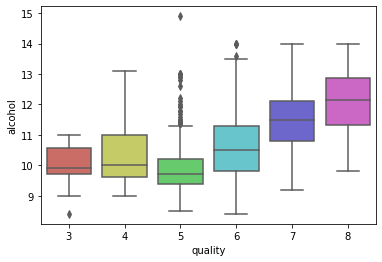

In [42]:
#Box plot of each variable (feature) for each wine quality
for i in features[1:]:
    sns.boxplot(x='quality', y=i, data=data, palette='hls')
    plt.show()

Based on the boxplots, we can compare the values of each feature for each wine quality. Also we can see that there are several outliers for some features and many outliers for some other features. The outliers for fixed acidity, volatile acidity, citric acid, and total sulphur dioxide. 

In [46]:
features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
def remove_outlier(df_in, col_name):
    
    '''
    Function to remove outliers 
    '''
    
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [50]:
#removing outliers based on box plots for only the features that had few outliers to not lose a lot of data

features_outliers=features[['fixed acidity','volatile acidity', 'citric acid', 'total sulfur dioxide']]

for col in features_outliers[1:]:
    data_clean=remove_outlier(data,col)

In [51]:
data_clean['quality'].value_counts()

6    632
5    631
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

In [52]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Comparing the clean data with the original data, few points of our majority classes are removed and number of minority classes stayed the same. Therefore, we did not lose a lot of data.

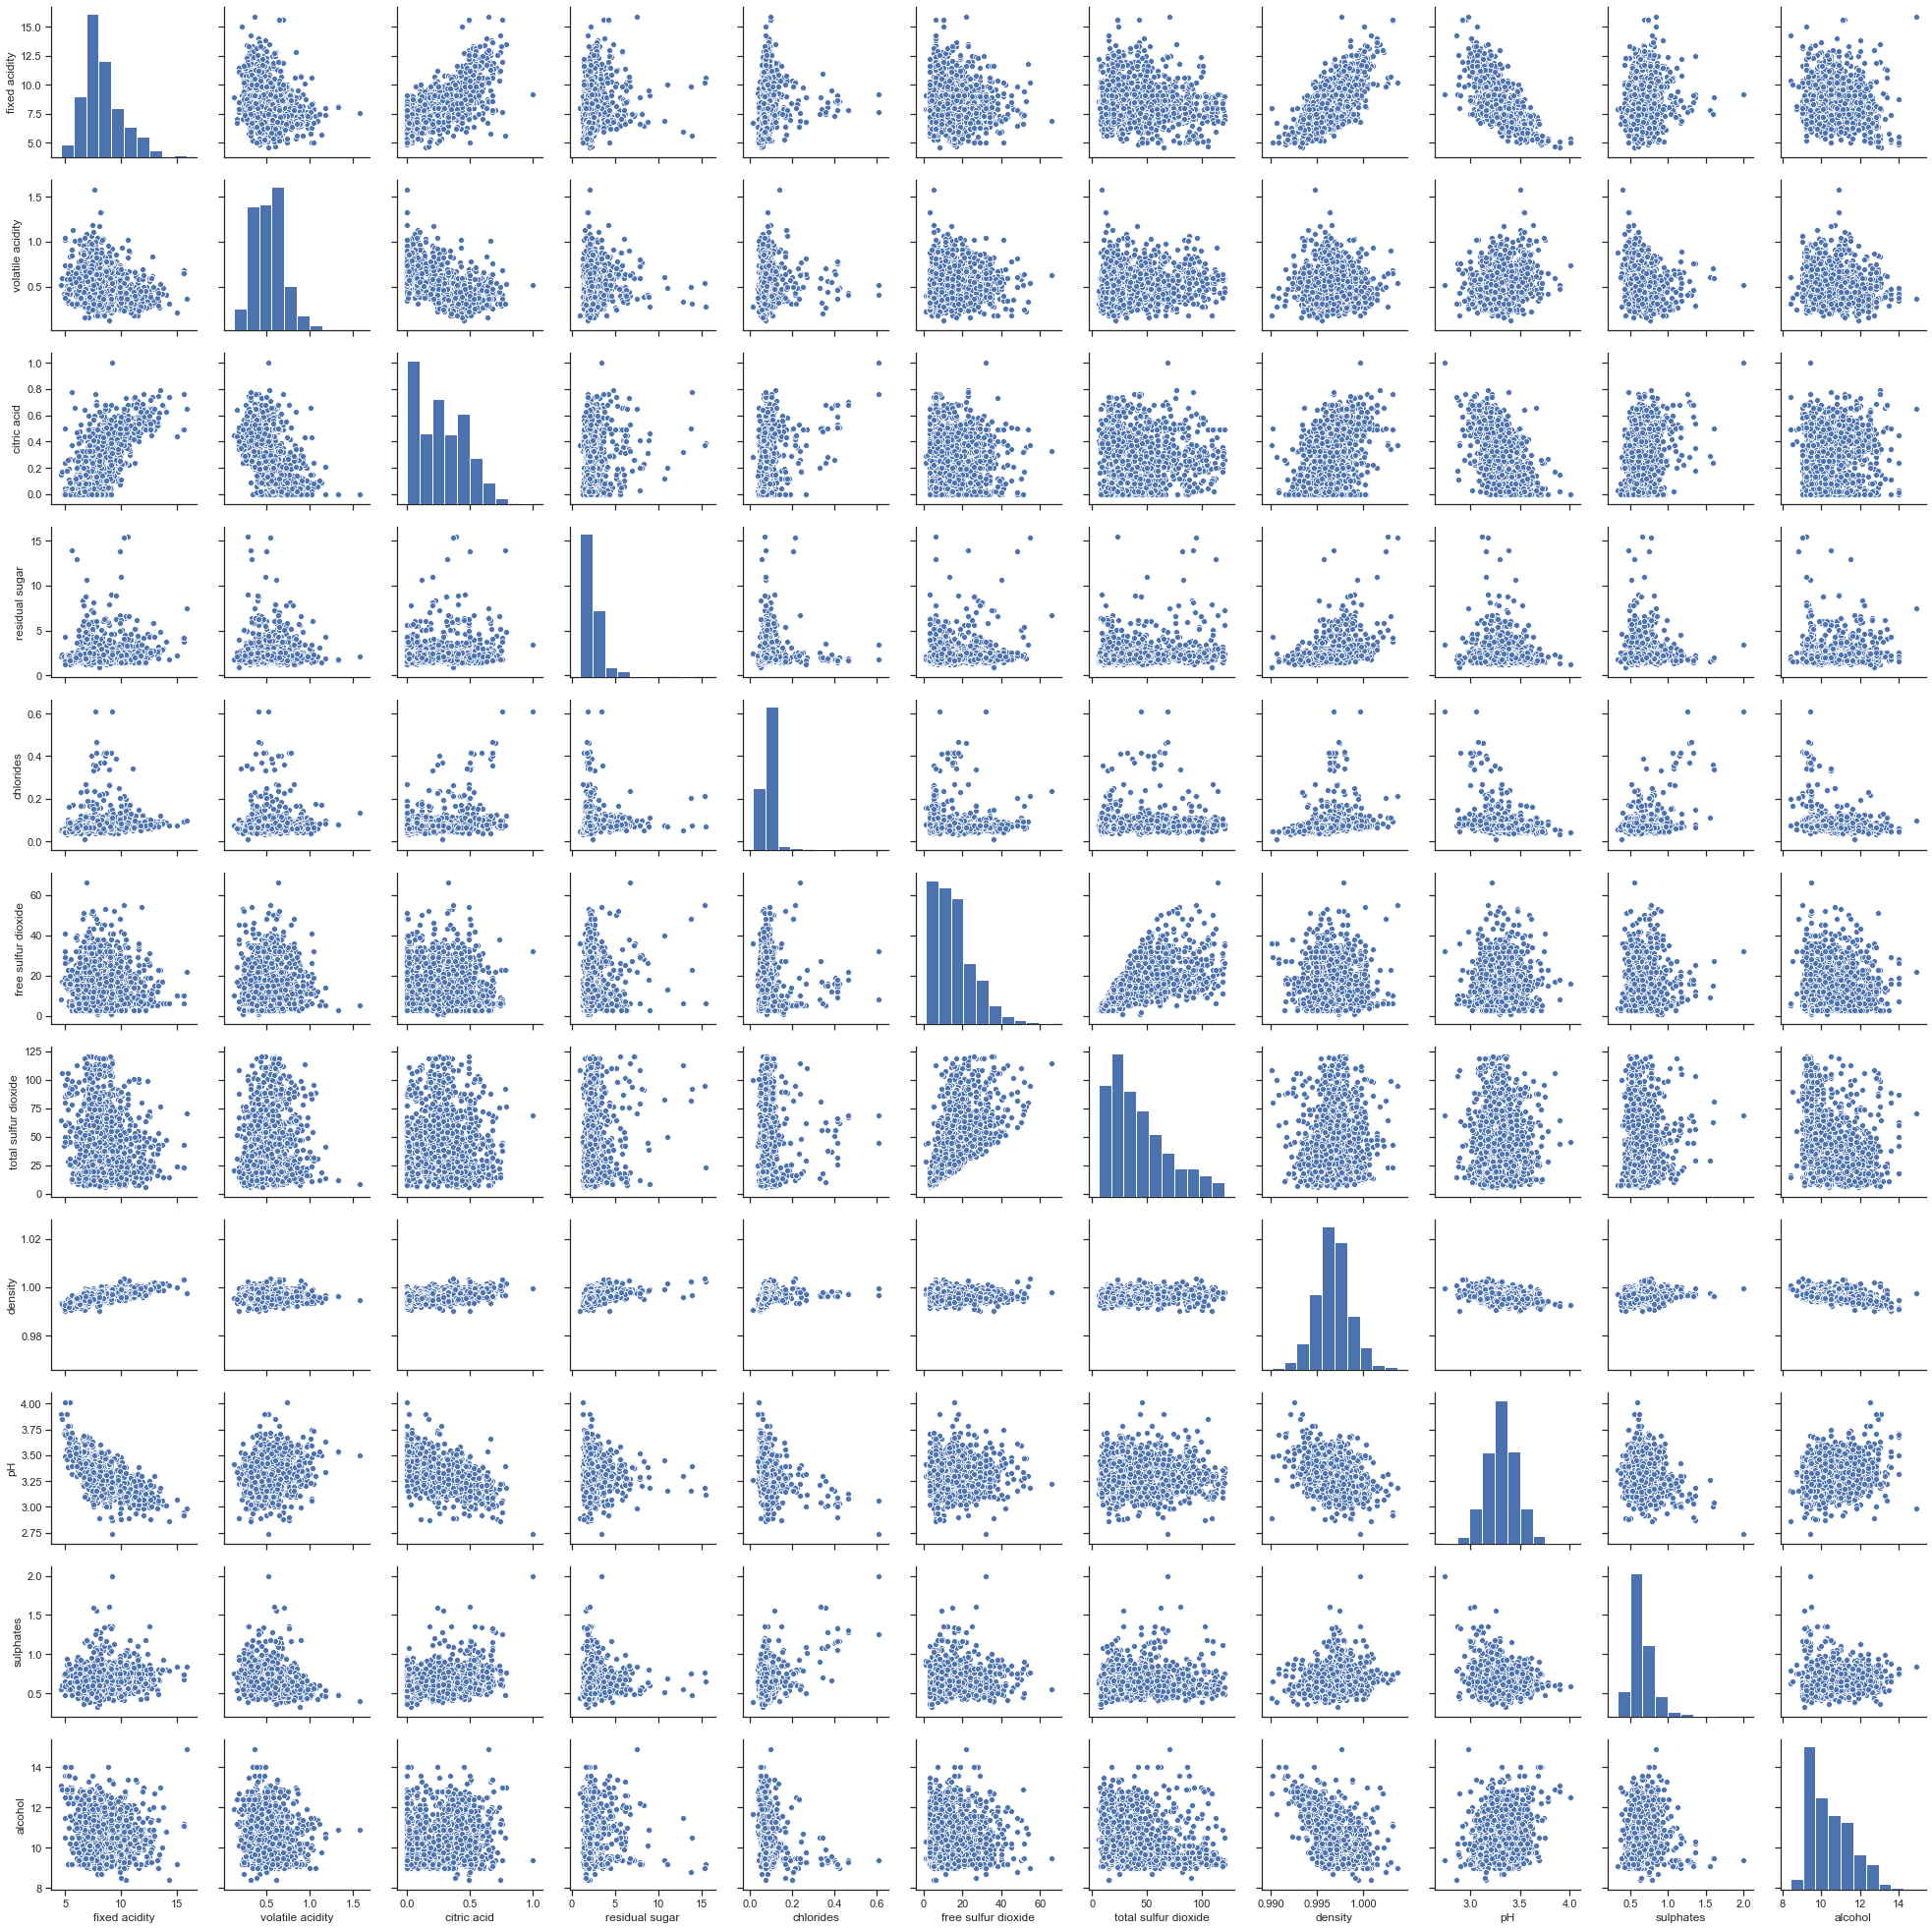

In [61]:
# Bivaraiate Analysis to see if the features are correlated and to see overall distribution of each feature
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_clean.drop('quality', axis=1))


Based on the pair plot above, food acidity is correlated with citric acid, density, and pH. Also, food acidity has a normal distribution with positive skew, density, pH, and Sulphates have normal distribution; however, residual sugar and chlorides do not have much difference for different wines in our dataset.

## Preparing Data for Model:

In [82]:
#Separating features from model label(quality)
X = data_clean.drop('quality',axis=1)
y = data_clean['quality']

In [67]:
#splitting dataset into training and testing data set(train=0.7 and test=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [76]:
#Fitting Random Forest model and applying stratified K-Fold cross-validation
model_1 = RandomForestClassifier(n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model_1, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

model_1.fit(X_train, y_train)

# with all this data, lets see what our accuracy is
y_predict = model_1.predict(X_test)
print(accuracy_score(y_test, y_predict))

# classification report
print(classification_report(y_test, y_predict))

0.6479481641468683
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.69      0.76      0.72       192
           6       0.60      0.69      0.64       189
           7       0.71      0.41      0.52        61
           8       0.00      0.00      0.00         5

    accuracy                           0.65       463
   macro avg       0.33      0.31      0.31       463
weighted avg       0.63      0.65      0.63       463



C:\Users\Taraneh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the number of categories with qualities 3,4, and 8 are very small and cannot be predicted using this model.

## Model improvment by oversampling:

In [83]:
# transform the dataset by SMOTE oversampling
oversample = SMOTE()
X_2, y_2 = oversample.fit_resample(X, y)

In [86]:
y_2.count()

3792

In [87]:
y.count()

1541

In [88]:
#splitting the new dataset (oversampled) into train an test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.30, random_state = 42)

In [89]:
#Fitting Random Forest model to the oversampled dataset and applying stratified K-Fold cross-validation
model_1 = RandomForestClassifier(n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model_1, X_train_2, y_train_2, cv=k_fold, scoring='accuracy', n_jobs=-1)

model_1.fit(X_train_2, y_train_2)

# with all this data, lets see what our accuracy is
y_predict_2 = model_1.predict(X_test_2)
print(accuracy_score(y_test_2, y_predict_2))

# classification report
print(classification_report(y_test_2, y_predict_2))

0.8409490333919156
              precision    recall  f1-score   support

           3       0.97      0.99      0.98       181
           4       0.89      0.94      0.92       196
           5       0.70      0.77      0.74       191
           6       0.71      0.54      0.61       203
           7       0.82      0.90      0.86       184
           8       0.93      0.93      0.93       183

    accuracy                           0.84      1138
   macro avg       0.84      0.85      0.84      1138
weighted avg       0.84      0.84      0.84      1138



In [94]:
# Hyperparameter optimization using Grid search CV

#setting a Random Forest Instance
rf_model = RandomForestClassifier()

# Step 1) Defining the parameters we want to test

paramater_dict = {'max_depth': [2, 3, 4, None],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None], 
              'criterion': ['gini', 'entropy']}

# Step 2) Setting parameters in GridSerachCV
cv_rf = GridSearchCV(
                  rf_model, #our estimator (e.g random forest model instance)
                  param_grid=paramater_dict, #our paremeters,
                  cv = 5,
                  n_jobs = -1
                  )
# Step 3) Training against what we set in Step 3.
cv_rf.fit(X_train_2, y_train_2)

# Printing the best parameters
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}


In [95]:
#running the model with optimized hyperparameters

model_1 = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=None, max_features='auto', n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model_1, X_train_2, y_train_2, cv=k_fold, scoring='accuracy', n_jobs=-1)

model_1.fit(X_train_2, y_train_2)

# with all this data, lets see what our accuracy is
y_predict_2 = model_1.predict(X_test_2)
print(accuracy_score(y_test_2, y_predict_2))

# classification report
print(classification_report(y_test_2, y_predict_2))

0.8479789103690686
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       181
           4       0.89      0.95      0.92       196
           5       0.71      0.77      0.74       191
           6       0.73      0.55      0.63       203
           7       0.81      0.90      0.85       184
           8       0.97      0.95      0.96       183

    accuracy                           0.85      1138
   macro avg       0.85      0.85      0.85      1138
weighted avg       0.84      0.85      0.84      1138



We can see that oversampling has improved the overall accuracy and the result for each of the classes.

# Grouping the data into 3 categories based on their quality:

Another way to tackle the problem of not having enough data for several classes is to group the categories. For instance, I grouped them into 3 categories based on their quality as following:

In [168]:
# Category 1 for wine qualities of 3 and 4
data_clean.loc[(data_clean['quality']==3), 'category'] = 1
data_clean.loc[(data_clean['quality']==4), 'category'] = 1

In [169]:
# Category 2 for wine qualities of 5 and 6
data_clean.loc[(data_clean['quality']==5), 'category'] = 2
data_clean.loc[(data_clean['quality']==6), 'category'] = 2

In [170]:
# Category 3 for wine qualities of 7 and 8
data_clean.loc[(data_clean['quality']==7), 'category'] = 3
data_clean.loc[(data_clean['quality']==8), 'category'] = 3

In [172]:
data_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.0


In [173]:
data_clean['category'].value_counts()

2.0    1263
3.0     215
1.0      63
Name: category, dtype: int64

We can see that our dataset is still imbalanced after grouping them into 3 categories. Therefore, we need to over sample minority groups.

In [174]:
# Separating features columns from label(category)
X_3 = data_clean.drop(['quality','category'],axis=1)
y_3 = data_clean['category']

In [175]:
# transform the dataset by oversampling
oversample = SMOTE()
X_4, y_4 = oversample.fit_resample(X_3, y_3)

In [176]:
#splitting training and test data 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.30, random_state = 42)

In [177]:
#Fitting Random Forest model to the categorized oversampled dataset and applying stratified K-Fold cross-validation
model_2 = RandomForestClassifier(n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model_2, X_train_4, y_train_4, cv=k_fold, scoring='accuracy', n_jobs=-1)

model_2.fit(X_train_4, y_train_4)

# with all this data, lets see what our accuracy is
y_predict_4 = model_2.predict(X_test_4)
print(accuracy_score(y_test_4, y_predict_4))

# classification report
print(classification_report(y_test_4, y_predict_4))

0.9190853122251539
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       385
         2.0       0.92      0.84      0.88       390
         3.0       0.89      0.96      0.92       362

    accuracy                           0.92      1137
   macro avg       0.92      0.92      0.92      1137
weighted avg       0.92      0.92      0.92      1137



In [178]:
#hyperparameters tunning using Grid Search CV

#setting a Random Forest Instance
rf_model = RandomForestClassifier()

# Step 1) Defining the parameters we want to test

paramater_dict = {'max_depth': [2, 3, 4, None],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None], 
              'criterion': ['gini', 'entropy']}

# Step 2) Setting parameters in GridSerachCV
cv_rf = GridSearchCV(
                  rf_model, #our estimator (e.g random forest model instance)
                  param_grid=paramater_dict, #our paremeters,
                  cv = 5,
                  n_jobs = -1
                  )
# Step 3) Training against what we set in Step 3.
cv_rf.fit(X_train_4, y_train_4)

# Printing the best parameters
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2'}


In [179]:
#random forest model using optimized hyperparameters

model_2 = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=None, max_features='log2', n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model_2, X_train_4, y_train_4, cv=k_fold, scoring='accuracy', n_jobs=-1)

model_2.fit(X_train_4, y_train_4)

# with all this data, lets see what our accuracy is
y_predict_4 = model_2.predict(X_test_4)
print(accuracy_score(y_test_4, y_predict_4))

# classification report
print(classification_report(y_test_4, y_predict_4))

0.9322779243623571
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       385
         2.0       0.93      0.86      0.90       390
         3.0       0.90      0.98      0.94       362

    accuracy                           0.93      1137
   macro avg       0.93      0.93      0.93      1137
weighted avg       0.93      0.93      0.93      1137



We can see that grouping data into 3 categories has improved our model performance. 

# Conclusion:
Grouping data into 3 categories along with oversampling minority classes has improved model performance (overall accuracy of 0.93). Original categories combined oversampling minority classes resulted in overall accuracy of 0.85 and the base model (using original data without any transformation) had overall accuracy of 0.65 without the ability of predicting minority classes. 